In [229]:
from matplotlib import pyplot as plt

In [230]:
categories = [
    'Feb 15', 'Feb 16', 'Feb 17', 'Feb 18', 'Feb 19', 'Feb 20', 'Feb 21',
    'Feb 22', 'Feb 23', 'Feb 24', 'Feb 25', 'Feb 26', 'Feb 27', 'Feb 28',
    'Feb 29', 'Mar 01', 'Mar 02', 'Mar 03', 'Mar 04', 'Mar 05', 'Mar 06',
    'Mar 07', 'Mar 08', 'Mar 09', 'Mar 10', 'Mar 11', 'Mar 12', 'Mar 13',
    'Mar 14', 'Mar 15', 'Mar 16', 'Mar 17', 'Mar 18', 'Mar 19', 'Mar 20',
    'Mar 21',
]

In [231]:
countries = {
    'italy': {
        'population': 60480000,
        'data': [
            3, 3, 3, 3, 3, 4, 21,
            79, 157, 229, 323, 470, 655, 889,
            1128, 1701, 2036, 2502, 3089, 3858, 4636,
            5883, 7375, 9172, 10149, 12462, 15113, 17660,
            21157, 24747, 27980, 31506, 35713, 41035, 47021,
            53578,
        ],
    },
    'spain': {
        'population': 46660000,
        'data': [
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 1, 7, 11, 23, 31,
            56, 82, 118, 162, 224, 276, 387,
            485, 625, 1169, 1524, 2039, 2871, 4906,
            5678, 7177, 9070, 10265, 13050, 16139, 21510,
            25496,
        ],
    },
    'germany': {
        'population': 82790000,
        'data': [
            13, 13, 9, 7, 7, 3, 2,
            2, 2, 2, 3, 11, 32, 58,
            63, 114, 149, 187, 246, 528, 652,
            782, 1022, 1204, 1545, 1938, 2714, 3621,
            4544, 5754, 7188, 9274, 12194, 15161, 19848,
            22364,
        ],

    },
    'france': {
        'population': 66990000,
        'data': [
            7, 7, 6, 4, 4, 4, 4,
            1, 1, 0, 2, 5, 25, 44,
            86, 116, 176, 196, 269, 404, 632,
            921, 1178, 1370, 1739, 2221, 2803, 3570,
            4396, 5284, 6473, 6953, 8268, 9328, 12612,
            14459,
        ],
    },
    'usa': {
        'population': 330000000,
        'data': [
            12, 12, 12, 12, 12, 10, 29,
            29, 28, 48, 51, 54, 54, 57,
            60, 65, 85, 106, 138, 200, 289,
            401, 504, 663, 949, 1248, 1625, 2157,
            2830, 3553, 4503, 6196, 9003, 13474, 18121,
            24207,
        ],
    },
    'uk': {
        'population': 66440000,
        'data': [
            1, 1, 1, 1, 1, 1, 1,
            1, 5, 5, 5, 5, 8, 12,
            15, 28, 31, 43, 79, 97, 144,
            189, 257, 298, 359, 434, 562, 769,
            1101, 1336, 1436, 1814, 2457, 3060, 3741,
            5018,
        ],
    },
    'switzerland': {
        'population': 8570000,
        'data': [
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 1, 1, 8, 15,
            19, 23, 29, 56, 90, 116, 210,
            264, 327, 369, 491, 644, 857, 1124,
            1358, 2199, 2330, 2700, 3067, 4164, 5544,
            6863,
        ],
    },
}

In [232]:
figkwargs = dict(
    figsize=(9, 9),
    dpi=80,
)
xtickskwargs = dict(
    rotation=45,
)

legendkwargs = dict(
    loc='upper left',
)

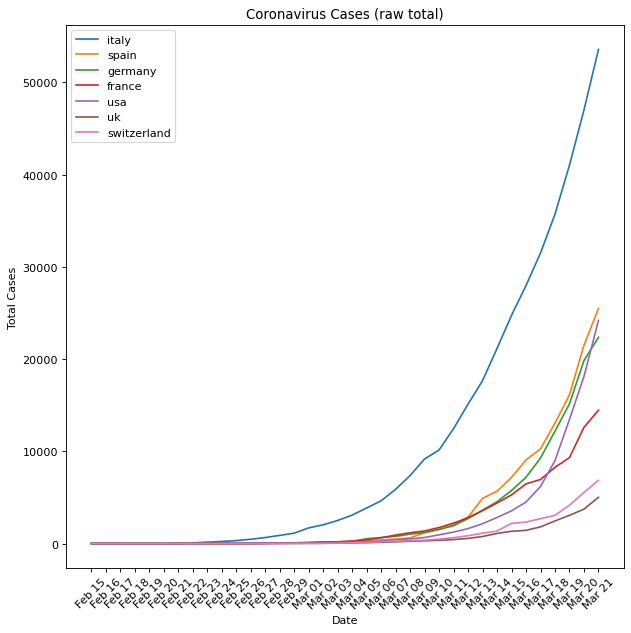

In [233]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties['data']
    data += [float('NaN')] * (len(categories) - len(data))
    plt.plot(categories, data, label=country)


plt.title('Coronavirus Cases (raw total)')
plt.ylabel('Total Cases')
plt.xlabel('Date')
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()


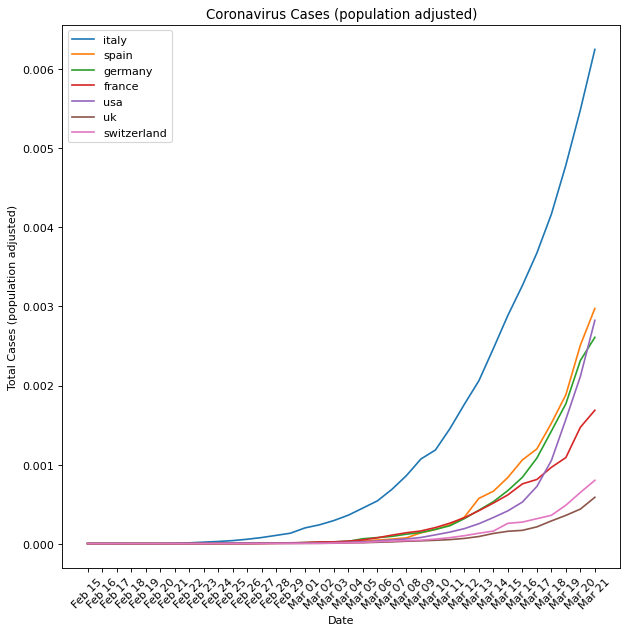

In [234]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    data = cproperties['data']
    data += [float('NaN')] * (len(categories) - len(data))
    data = [x/population for x in data]
    plt.plot(categories, data, label=country)

plt.title('Coronavirus Cases (population adjusted)')
plt.ylabel('Total Cases (population adjusted)')
plt.xlabel('Date')
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()

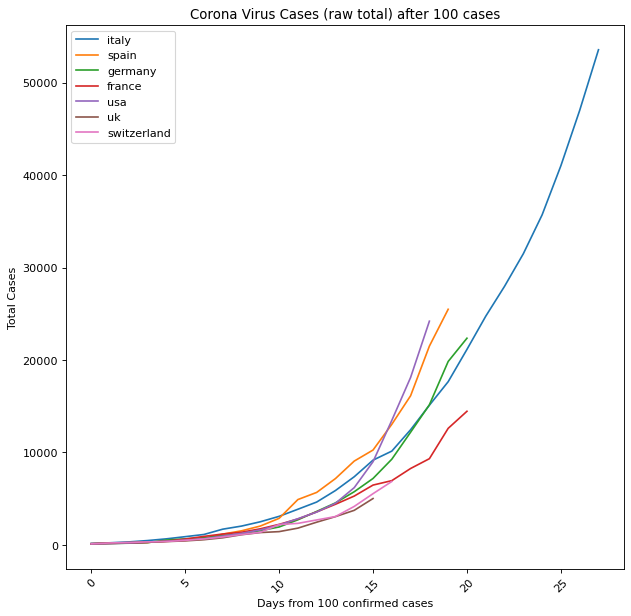

In [235]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties['data']
    data = [x for x in data if x >= 100]
    data += [float('NaN')] * (len(categories) - len(data))
    plt.plot(range(len(categories)), data, label=country)


plt.title('Corona Virus Cases (raw total) after 100 cases')
plt.xticks(**xtickskwargs)
plt.ylabel('Total Cases')
plt.xlabel('Days from 100 confirmed cases')
plt.legend(**legendkwargs)
plt.show()

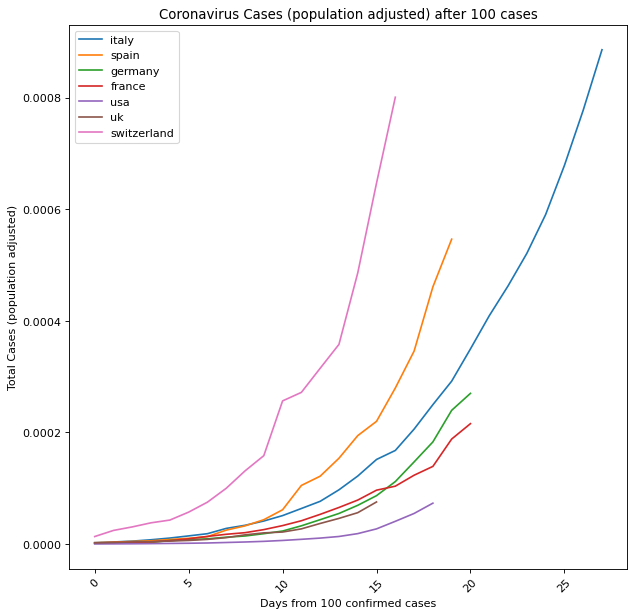

In [236]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties['data']
    data = [x for x in data if x >= 100]
    data += [float('NaN')] * (len(categories) - len(data))
    data = [x/population for x in data]
    plt.plot(range(len(categories)), data, label=country)


plt.title('Coronavirus Cases (population adjusted) after 100 cases')
plt.ylabel('Total Cases (population adjusted)')
plt.xlabel('Days from 100 confirmed cases')
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()

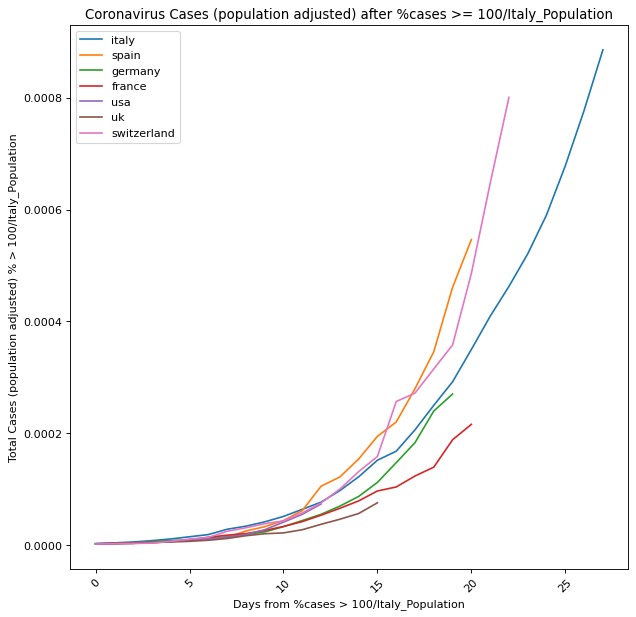

In [237]:
fig = plt.figure(**figkwargs)
explodes = 100 / countries['italy']['population']
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties['data']
    data = [x/population for x in data if x/population >= explodes]
    data += [float('NaN')] * (len(categories) - len(data))
    plt.plot(range(len(categories)), data, label=country)


plt.title('Coronavirus Cases (population adjusted) after %cases >= 100/Italy_Population')
plt.ylabel('Total Cases (population adjusted) % > 100/Italy_Population')
plt.xlabel('Days from %cases > 100/Italy_Population')
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()